#### In this proect we are going to firstly analyze the data of power(electricity) consumption from 2004 until 2018 using 
#### data visualization and other analysis tools. Then using long short-term memory model (LSTM) which is a type of
#### RNN , we try to predict the energy consumption for the following two months.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

In [77]:
# Reading the data, and setting the date time as index, and changing its format to datetime)

df=pd.read_csv('AEP_hourly.csv',parse_dates=['Datetime'],index_col='Datetime',)
df

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


In [78]:
df.loc['2018-08-03']  # Last Day in the data set

,AEP_MW
Datetime,
2018-08-03,14809.0


In [79]:
df.loc['2018-08-04']

,AEP_MW
Datetime,


## Step 1 : Obtain some basic information about dataset

In [80]:
print('some basic information about the dataset','\n')
print(df.info(),'\n')

print('-'*80)
print('describing the dataset','\n')
print(df.describe(),'\n')

print('-'*80)
print('number of nan values','\n')
print(df.isna().sum(),'\n')

print('-'*80)
print('number of null values','\n')
print(df.isnull().sum(),'\n')

some basic information about the dataset 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB
None 

--------------------------------------------------------------------------------
describing the dataset 

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

--------------------------------------------------------------------------------
number of nan values 

AEP_MW    0
dtype: int64 

--------------------------------------------------------------------------------
number of null values 

AEP_MW    0
dtype: int64 



In [81]:
# Obtaining important information from the date time index like days,week,.....

df['date'] = df.index.date
df['year'] = df.index.year
df['month'] = df.index.month
df['day_name'] = df.index.day_name()
df['day'] = df.index.day
df['time'] = df.index.time
df['week'] = df.index.week
df['season'] = (df.index.month%12 + 3)//3
df['season'] = df['season'].replace({1:'winter',
                                     2:'spring',
                                     3:'summer',
                                     4:'fall'})
df.head()

<ipython-input-81-328e30cd2c27>:9: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,AEP_MW,date,year,month,day_name,day,time,week,season
Datetime,,,,,,,,,
2004-12-31 01:00:00,13478.0,2004-12-31,2004,12,Friday,31,01:00:00,53,winter
2004-12-31 02:00:00,12865.0,2004-12-31,2004,12,Friday,31,02:00:00,53,winter
2004-12-31 03:00:00,12577.0,2004-12-31,2004,12,Friday,31,03:00:00,53,winter
2004-12-31 04:00:00,12517.0,2004-12-31,2004,12,Friday,31,04:00:00,53,winter
2004-12-31 05:00:00,12670.0,2004-12-31,2004,12,Friday,31,05:00:00,53,winter


In [82]:
print(df['year'].nunique())
df['year'].unique()

15


array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018], dtype=int64)

## Step 2 : EDA and Visualization

Text(0.5, 1.0, 'Energy consumption of each year')

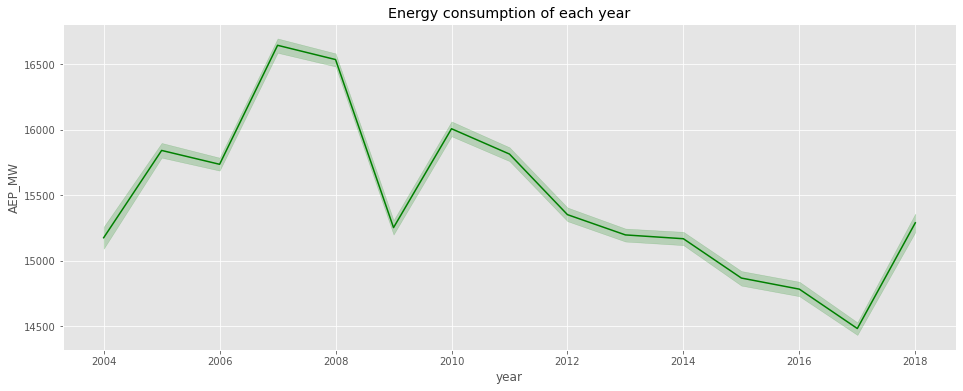

In [83]:
# visualization of energy consumption for each year 
plt.figure(figsize=(16,6))
style.use('ggplot')
sns.lineplot(x='year',y='AEP_MW',data=df,color='green')
plt.title('Energy consumption of each year')

Text(0.5, 1.0, 'consumption of 2015')

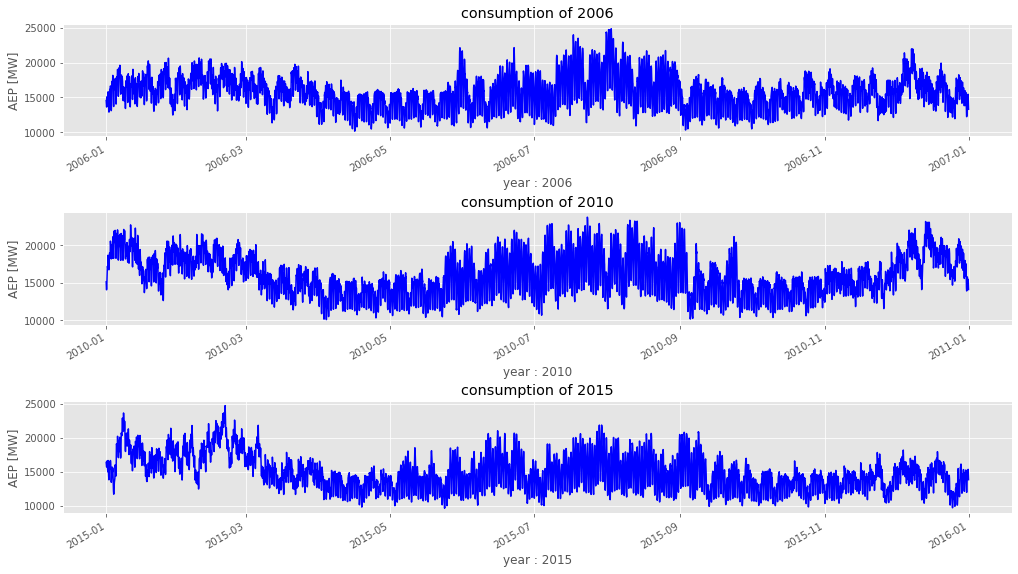

In [84]:
fig = plt.figure(figsize=(17,10))
grid = plt.GridSpec(nrows=16, ncols=1, hspace=0.7, wspace=0)

ax1 = fig.add_subplot(grid[:4, :])
df[df['year']==2006]['AEP_MW'].plot(ax=ax1,color='blue')
ax1.set_xlabel('year : 2006')
ax1.set_ylabel('AEP [MW]')
ax1.set_title('consumption of 2006')


ax2 = fig.add_subplot(grid[6:10, :])
df[df['year']==2010]['AEP_MW'].plot(ax=ax2,color='blue')
ax2.set_xlabel('year : 2010')
ax2.set_ylabel('AEP [MW]')
ax2.set_title('consumption of 2010')


ax3 = fig.add_subplot(grid[12:16, :])
df[df['year']==2015]['AEP_MW'].plot(ax=ax3,color='blue')
ax3.set_xlabel('year : 2015')
ax3.set_ylabel('AEP [MW]')
ax3.set_title('consumption of 2015')



C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Energy Distribution')

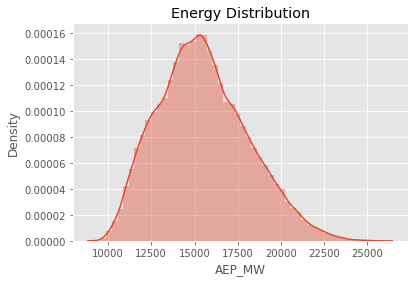

In [85]:
sns.distplot(df['AEP_MW'])
plt.title('Energy Distribution')

In [86]:
g = df.groupby(['time'])

# For each group, calculate the average of only the MW column
hourly_averages = g.aggregate({'AEP_MW':np.mean})
hourly_averages

,AEP_MW
time,
00:00:00,14651.191569
01:00:00,13891.478433
02:00:00,13432.062995
03:00:00,13184.049008
04:00:00,13095.193350
05:00:00,13240.535813
06:00:00,13802.401464
07:00:00,14781.668381
08:00:00,15478.830233


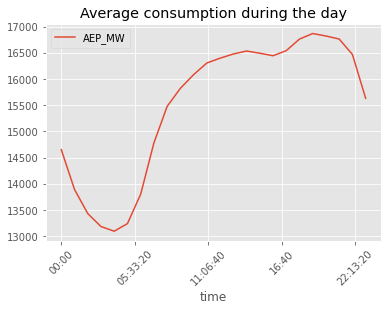

In [87]:
hourly_averages.plot()
plt.xticks(rotation=45);
plt.title('Average consumption during the day')
plt.show()

#### Since the number of data is huge, it is better to resample the data from hourly to daily. It also helps us to analyze easier

In [88]:
res_data = df.resample('D').mean()
res_data.head()

,AEP_MW,year,month,day,week
Datetime,,,,,
2004-10-01,14284.521739,2004,10,1,40
2004-10-02,12999.875000,2004,10,2,40
2004-10-03,12227.083333,2004,10,3,40
2004-10-04,14309.041667,2004,10,4,41
2004-10-05,14439.708333,2004,10,5,41


In [89]:
res_data.tail()

,AEP_MW,year,month,day,week
Datetime,,,,,
2018-07-30,15368.083333,2018,7,30,31
2018-07-31,15180.291667,2018,7,31,31
2018-08-01,15151.166667,2018,8,1,31
2018-08-02,15687.666667,2018,8,2,31
2018-08-03,14809.000000,2018,8,3,31


In [90]:
print("Old Dataset ",df.shape )
print("New  Dataset ",res_data.shape )



Old Dataset  (121273, 9)
New  Dataset  (5055, 5)


In [91]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [92]:

Test= res_data.tail(60)

Training = res_data.iloc[:,0:1]

Training = Training[:-60]

Training

,AEP_MW
Datetime,
2004-10-01,14284.521739
2004-10-02,12999.875000
2004-10-03,12227.083333
2004-10-04,14309.041667
2004-10-05,14439.708333
...,...
2018-05-31,16741.083333
2018-06-01,15734.666667
2018-06-02,14212.166667


In [93]:
Training = Training.values
scalar = MinMaxScaler()
Train_sc = scalar.fit_transform(Training)

In [94]:
X_Train = []
Y_Train = []

for i in range(60, Train_sc.shape[0]):
    
    X_Train.append(Train_sc[i-60:i])
    
    Y_Train.append(Train_sc[i])

X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [95]:
# training data must be 3D to input the LSTM  (Datapoints,step,1) 

X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

In [120]:
# firstly we need to create sequential
model = Sequential()

# defing the first layer of LSTM model; Note that the input shabe must must be 
# (60=time step,1=features in each step) ; output is used to another layer of LSTM so sequence=True

model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
model.add(Dropout(0.25))  # dropout and regularization randomly 20% of output data to prevent overloading

# Second LSTM layer
model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.25))

# Third LSTM layer 
model.add(LSTM(units = 60))
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 60, 60)            14880     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 60)            29040     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 60)                29040     
_________________________________________________________________
dropout_11 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [121]:
model.fit(X_Train, Y_Train, epochs = 50, batch_size = 40)

Epoch 1/50
124/124 [==============================] - 42s 248ms/step - loss: 0.0216
Epoch 2/50
124/124 [==============================] - 32s 260ms/step - loss: 0.0165
Epoch 3/50
124/124 [==============================] - 33s 269ms/step - loss: 0.0162
Epoch 4/50
124/124 [==============================] - 34s 272ms/step - loss: 0.0162
Epoch 5/50
124/124 [==============================] - 37s 296ms/step - loss: 0.0148
Epoch 6/50
124/124 [==============================] - 31s 252ms/step - loss: 0.0140
Epoch 7/50
124/124 [==============================] - 28s 227ms/step - loss: 0.0127
Epoch 8/50
124/124 [==============================] - 27s 220ms/step - loss: 0.0101
Epoch 9/50
124/124 [==============================] - 28s 223ms/step - loss: 0.0092
Epoch 10/50
124/124 [==============================] - 27s 222ms/step - loss: 0.0087
Epoch 11/50
124/124 [==============================] - 30s 245ms/step - loss: 0.0085
Epoch 12/50
124/124 [==============================] - 30s 245ms/step - lo

In [122]:
df_final = pd.concat((res_data[["AEP_MW"]], Test[["AEP_MW"]]), axis=0)
df_final

,AEP_MW
Datetime,
2004-10-01,14284.521739
2004-10-02,12999.875000
2004-10-03,12227.083333
2004-10-04,14309.041667
2004-10-05,14439.708333
...,...
2018-07-30,15368.083333
2018-07-31,15180.291667
2018-08-01,15151.166667


In [123]:
Test.shape

(60, 5)

In [124]:
res_data.shape

(5055, 5)

In [125]:
inputs = df_final[len(df_final) - len(Test) - 60:].values.reshape(-1,1)

inputs = scalar.transform(inputs)

X_test = []
for i in range(60, 120):
    X_test.append(inputs[i-60:i])
    
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_test.shape

(60, 60, 1)

In [126]:
predicted_aep = model.predict(X_test)

predicted_aep = scalar.inverse_transform(predicted_aep)

In [127]:
True_aep = Test["AEP_MW"].to_list()
Predicted_aep  = predicted_aep
dates = Test.index.to_list()

In [128]:
AEP = pd.DataFrame(data={
    "Date":dates,
    "Real_AEP": True_aep,
    "Predicted_AEP":[x[0] for x in predicted_aep ]
})

In [129]:
AEP

,Date,Real_AEP,Predicted_AEP
0,2018-06-05,13776.958333,13790.260742
1,2018-06-06,13451.041667,14280.987305
2,2018-06-07,14394.416667,15118.377930
3,2018-06-08,15040.041667,15071.691406
4,2018-06-09,14359.875000,15256.697266
5,2018-06-10,13852.250000,14426.988281
6,2018-06-11,14536.791667,13686.665039
7,2018-06-12,14744.041667,14113.832031
8,2018-06-13,15560.541667,14878.552734
9,2018-06-14,15520.416667,16822.527344


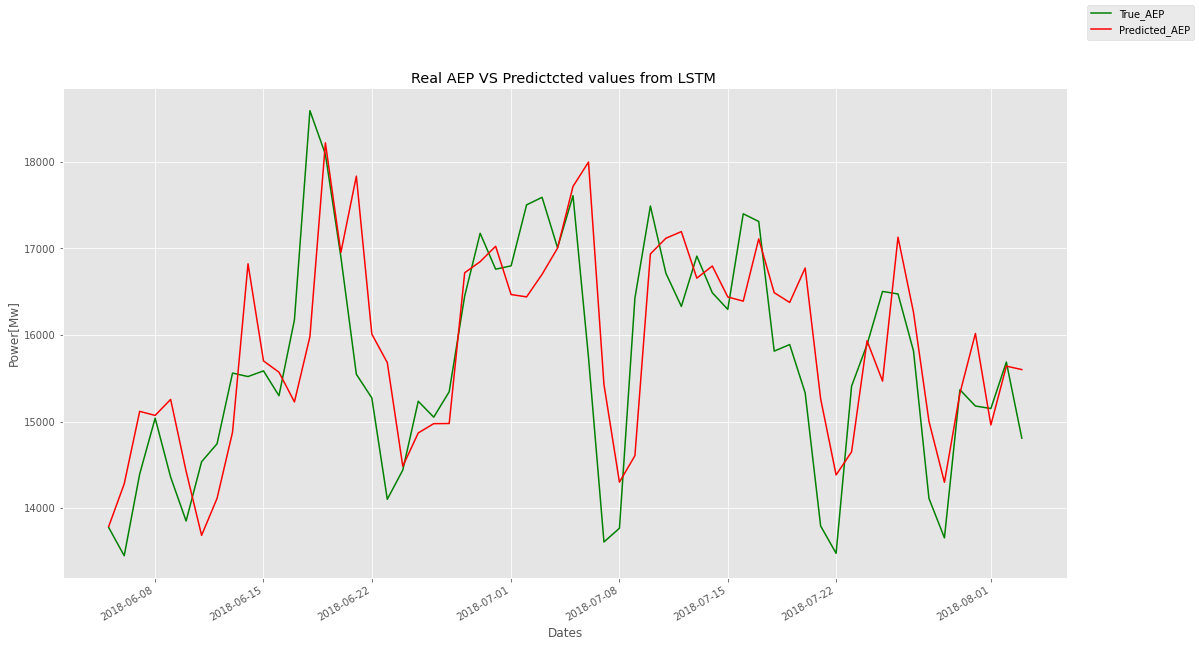

In [137]:
fig = plt.figure(figsize=(18,10))

ax1= fig.add_subplot(111)


plt.plot(dates,True_aep, color="green",label='True_AEP')
plt.plot(dates,predicted_aep, color="red",label='Predicted_AEP')

plt.gcf().autofmt_xdate()
plt.title("Real AEP VS Predictcted values from LSTM ")
plt.xlabel('Dates')
plt.ylabel("Power[Mw]")
fig.legend()

